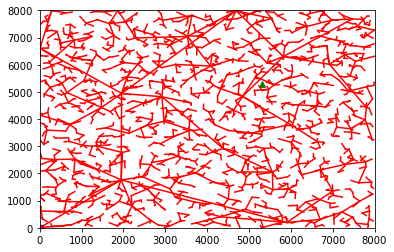

<Figure size 432x288 with 0 Axes>

In [6]:
import random as rnd
import matplotlib.pyplot as plt
from math import sqrt,cos,sin,atan2

class Point():
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def distance(self,p):
        return sqrt(abs(self.x - p.x)*abs(self.x - p.x) + abs(self.y - p.y)*abs(self.y - p.y))


    

def get_random_point(maxx,maxy):
    x = rnd.randint(0,maxx)
    y = rnd.randint(0,maxy)
    p = Point(x,y)
    return p


def get_a_point_along_the_line(startPoint,endPoint,distance):
    theta = atan2(endPoint.y-startPoint.y,endPoint.x-startPoint.x)
    return Point(startPoint.x + distance*cos(theta), startPoint.y +distance*sin(theta))

def get_next_point(p1,p2,distance):
    if(p1.distance(p2))<distance:
        return p2
    else:
        return get_a_point_along_the_line(p1,p2,distance)


class Graph():
    #Goal point
    #Start point
    def __init__(self,startPoint,GoalPoint,length):
        self.startPoint = startPoint
        self.GoalPoint = GoalPoint
        self.length = length
    
    def rtt(self,maxDistance,iterations):
        plt.axis([0, 8000, 0, 8000])
        plt.plot([self.startPoint.x],[self.startPoint.y],"bs")
        plt.plot([self.GoalPoint.x],[self.GoalPoint.y],"g^")
        nodes = []
        nodes.append(self.startPoint)
        while iterations>0:
            randomPoint = get_random_point(self.length,self.length)
            nn = nodes[0]
            for p in nodes:
                if randomPoint.distance(p) < randomPoint.distance(nn):
                    nn = p
            distance = randomPoint.distance(nn)
            newPoint = get_next_point(nn,randomPoint,distance)
            plt.plot([nn.x,newPoint.x],[nn.y,newPoint.y],"r-")
            nodes.append(newPoint)
            iterations -= 1
#         x = []
#         y = []
        f = plt.figure()
        plt.show()
#         for i in nodes:
#             x.append(i.x)
#             y.append(i.y)
#         plt.plot(x,y,'ro')
        




graph = Graph(Point(10,10),Point(5300,5300),8000)
graph.rtt(10,2000)

        


        


iteration 1224


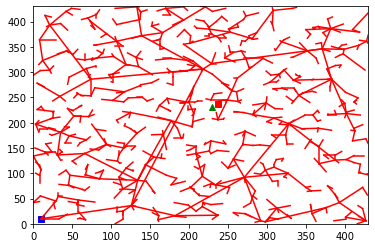

In [5]:
import random as rnd
import matplotlib.pyplot as plt
from math import sqrt,cos,sin,atan2

class Point():
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def distance(self,p):
        return sqrt(abs(self.x - p.x)*abs(self.x - p.x) + abs(self.y - p.y)*abs(self.y - p.y))


def nearPoint(p1,p2):
    if p1.distance(p2)<10 :
        return True
    else:
        return False

def get_random_point(maxx,maxy):
    x = rnd.randint(0,maxx)
    y = rnd.randint(0,maxy)
    p = Point(x,y)
    return p


def get_a_point_along_the_line(startPoint,endPoint,distance):
    theta = atan2(endPoint.y-startPoint.y,endPoint.x-startPoint.x)
    return Point(startPoint.x + distance*cos(theta), startPoint.y +distance*sin(theta))

def get_next_point(p1,p2,distance):
    if(p1.distance(p2))<distance:
        return p2
    else:
        return get_a_point_along_the_line(p1,p2,distance)


class Graph():
    #Goal point
    #Start point
    def __init__(self,startPoint,GoalPoint,length):
        self.startPoint = startPoint
        self.GoalPoint = GoalPoint
        self.length = length
    
    def rtt(self,maxDistance,iterations):
        plt.axis([0, 430, 0, 430])
        plt.plot([self.startPoint.x],[self.startPoint.y],"bs")
        plt.plot([self.GoalPoint.x],[self.GoalPoint.y],"g^")
        nodes = []
        nodes.append(self.startPoint)
        while iterations>0:
            randomPoint = get_random_point(self.length,self.length)
            nn = nodes[0]
            for p in nodes:
                if randomPoint.distance(p) < randomPoint.distance(nn):
                    nn = p
            distance = randomPoint.distance(nn)
            newPoint = get_next_point(nn,randomPoint,distance)
            plt.plot([nn.x,newPoint.x],[nn.y,newPoint.y],"r-")
            nodes.append(newPoint)
            if(nearPoint(self.GoalPoint,newPoint)):
                plt.plot([newPoint.x],[newPoint.y],"rs")
                print("iteration",iterations)
                break
            iterations -= 1
        plt.show()

#         x = []
#         y = []
#         for i in nodes:
#             x.append(i.x)
#             y.append(i.y)
#         plt.plot(x,y,'ro')
        




graph = Graph(Point(10,10),Point(230,230),430)
graph.rtt(10,2000)

        


        


In [3]:
class Env:
    def __init__(self):
        self.x_range = 51  # size of background
        self.y_range = 31
        self.motions = [(-1, 0), (-1, 1), (0, 1), (1, 1),
                        (1, 0), (1, -1), (0, -1), (-1, -1)]
        self.obs = self.obs_map()

    def update_obs(self, obs):
        self.obs = obs

    def obs_map(self):
        """
        Initialize obstacles' positions
        :return: map of obstacles
        """

        x = self.x_range
        y = self.y_range
        obs = set()

        for i in range(x):
            obs.add((i, 0))
        for i in range(x):
            obs.add((i, y - 1))

        for i in range(y):
            obs.add((0, i))
        for i in range(y):
            obs.add((x - 1, i))

        for i in range(10, 21):
            obs.add((i, 15))
        for i in range(15):
            obs.add((20, i))

        for i in range(15, 30):
            obs.add((30, i))
        for i in range(16):
            obs.add((40, i))

        return obs

In [6]:
import os
import sys
import matplotlib.pyplot as plt



class Plotting:
    def __init__(self, xI, xG):
        self.xI, self.xG = xI, xG
        self.env = Env()
        self.obs = self.env.obs_map()

    def update_obs(self, obs):
        self.obs = obs

    def animation(self, path, visited, name):
        self.plot_grid(name)
        self.plot_visited(visited)
        self.plot_path(path)
        plt.show()

    def animation_lrta(self, path, visited, name):
        self.plot_grid(name)
        cl = self.color_list_2()
        path_combine = []

        for k in range(len(path)):
            self.plot_visited(visited[k], cl[k])
            plt.pause(0.2)
            self.plot_path(path[k])
            path_combine += path[k]
            plt.pause(0.2)
        if self.xI in path_combine:
            path_combine.remove(self.xI)
        self.plot_path(path_combine)
        plt.show()

    def animation_ara_star(self, path, visited, name):
        self.plot_grid(name)
        cl_v, cl_p = self.color_list()

        for k in range(len(path)):
            self.plot_visited(visited[k], cl_v[k])
            self.plot_path(path[k], cl_p[k], True)
            plt.pause(0.5)

        plt.show()

    def animation_bi_astar(self, path, v_fore, v_back, name):
        self.plot_grid(name)
        self.plot_visited_bi(v_fore, v_back)
        self.plot_path(path)
        plt.show()

    def plot_grid(self, name):
        obs_x = [x[0] for x in self.obs]
        obs_y = [x[1] for x in self.obs]

        plt.plot(self.xI[0], self.xI[1], "bs")
        plt.plot(self.xG[0], self.xG[1], "gs")
        plt.plot(obs_x, obs_y, "sk")
        plt.title(name)
        plt.axis("equal")

    def plot_visited(self, visited, cl='gray'):
        if self.xI in visited:
            visited.remove(self.xI)

        if self.xG in visited:
            visited.remove(self.xG)

        count = 0

        for x in visited:
            count += 1
            plt.plot(x[0], x[1], color=cl, marker='o')
            plt.gcf().canvas.mpl_connect('key_release_event',
                                         lambda event: [exit(0) if event.key == 'escape' else None])

            if count < len(visited) / 3:
                length = 20
            elif count < len(visited) * 2 / 3:
                length = 30
            else:
                length = 40
            #
            # length = 15

            if count % length == 0:
                plt.pause(0.001)
        plt.pause(0.01)

    def plot_path(self, path, cl='r', flag=False):
        path_x = [path[i][0] for i in range(len(path))]
        path_y = [path[i][1] for i in range(len(path))]

        if not flag:
            plt.plot(path_x, path_y, linewidth='3', color='r')
        else:
            plt.plot(path_x, path_y, linewidth='3', color=cl)

        plt.plot(self.xI[0], self.xI[1], "bs")
        plt.plot(self.xG[0], self.xG[1], "gs")

        plt.pause(0.01)

    def plot_visited_bi(self, v_fore, v_back):
        if self.xI in v_fore:
            v_fore.remove(self.xI)

        if self.xG in v_back:
            v_back.remove(self.xG)

        len_fore, len_back = len(v_fore), len(v_back)

        for k in range(max(len_fore, len_back)):
            if k < len_fore:
                plt.plot(v_fore[k][0], v_fore[k][1], linewidth='3', color='gray', marker='o')
            if k < len_back:
                plt.plot(v_back[k][0], v_back[k][1], linewidth='3', color='cornflowerblue', marker='o')

            plt.gcf().canvas.mpl_connect('key_release_event',
                                         lambda event: [exit(0) if event.key == 'escape' else None])

            if k % 10 == 0:
                plt.pause(0.001)
        plt.pause(0.01)

    @staticmethod
    def color_list():
        cl_v = ['silver',
                'wheat',
                'lightskyblue',
                'royalblue',
                'slategray']
        cl_p = ['gray',
                'orange',
                'deepskyblue',
                'red',
                'm']
        return cl_v, cl_p

    @staticmethod
    def color_list_2():
        cl = ['silver',
              'steelblue',
              'dimgray',
              'cornflowerblue',
              'dodgerblue',
              'royalblue',
              'plum',
              'mediumslateblue',
              'mediumpurple',
              'blueviolet',
              ]
        return cl

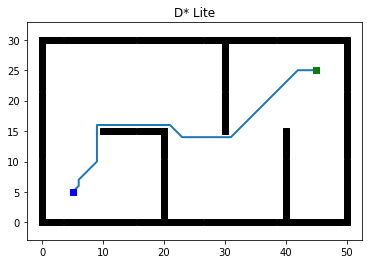

In [8]:
import os
import sys
import math
import matplotlib.pyplot as plt


class DStar:
    def __init__(self, s_start, s_goal, heuristic_type):
        self.s_start, self.s_goal = s_start, s_goal
        self.heuristic_type = heuristic_type

        self.Env = Env()  # class Env
        self.Plot = Plotting(s_start, s_goal)

        self.u_set = self.Env.motions  # feasible input set
        self.obs = self.Env.obs  # position of obstacles
        self.x = self.Env.x_range
        self.y = self.Env.y_range

        self.g, self.rhs, self.U = {}, {}, {}
        self.km = 0

        for i in range(1, self.Env.x_range - 1):
            for j in range(1, self.Env.y_range - 1):
                self.rhs[(i, j)] = float("inf")
                self.g[(i, j)] = float("inf")

        self.rhs[self.s_goal] = 0.0
        self.U[self.s_goal] = self.CalculateKey(self.s_goal)
        self.visited = set()
        self.count = 0
        self.fig = plt.figure()

    def run(self):
        self.Plot.plot_grid("D* Lite")
        self.ComputePath()
        self.plot_path(self.extract_path())
        self.fig.canvas.mpl_connect('button_press_event', self.on_press)
        plt.show()

    def on_press(self, event):
        x, y = event.xdata, event.ydata
        if x < 0 or x > self.x - 1 or y < 0 or y > self.y - 1:
            print("Please choose right area!")
        else:
            x, y = int(x), int(y)
            print("Change position: s =", x, ",", "y =", y)

            s_curr = self.s_start
            s_last = self.s_start
            i = 0
            path = [self.s_start]

            while s_curr != self.s_goal:
                s_list = {}

                for s in self.get_neighbor(s_curr):
                    s_list[s] = self.g[s] + self.cost(s_curr, s)
                s_curr = min(s_list, key=s_list.get)
                path.append(s_curr)

                if i < 1:
                    self.km += self.h(s_last, s_curr)
                    s_last = s_curr
                    if (x, y) not in self.obs:
                        self.obs.add((x, y))
                        plt.plot(x, y, 'sk')
                        self.g[(x, y)] = float("inf")
                        self.rhs[(x, y)] = float("inf")
                    else:
                        self.obs.remove((x, y))
                        plt.plot(x, y, marker='s', color='white')
                        self.UpdateVertex((x, y))
                    for s in self.get_neighbor((x, y)):
                        self.UpdateVertex(s)
                    i += 1

                    self.count += 1
                    self.visited = set()
                    self.ComputePath()

            self.plot_visited(self.visited)
            self.plot_path(path)
            self.fig.canvas.draw_idle()

    def ComputePath(self):
        while True:
            s, v = self.TopKey()
            if v >= self.CalculateKey(self.s_start) and \
                    self.rhs[self.s_start] == self.g[self.s_start]:
                break

            k_old = v
            self.U.pop(s)
            self.visited.add(s)

            if k_old < self.CalculateKey(s):
                self.U[s] = self.CalculateKey(s)
            elif self.g[s] > self.rhs[s]:
                self.g[s] = self.rhs[s]
                for x in self.get_neighbor(s):
                    self.UpdateVertex(x)
            else:
                self.g[s] = float("inf")
                self.UpdateVertex(s)
                for x in self.get_neighbor(s):
                    self.UpdateVertex(x)

    def UpdateVertex(self, s):
        if s != self.s_goal:
            self.rhs[s] = float("inf")
            for x in self.get_neighbor(s):
                self.rhs[s] = min(self.rhs[s], self.g[x] + self.cost(s, x))
        if s in self.U:
            self.U.pop(s)

        if self.g[s] != self.rhs[s]:
            self.U[s] = self.CalculateKey(s)

    def CalculateKey(self, s):
        return [min(self.g[s], self.rhs[s]) + self.h(self.s_start, s) + self.km,
                min(self.g[s], self.rhs[s])]

    def TopKey(self):
        """
        :return: return the min key and its value.
        """

        s = min(self.U, key=self.U.get)
        return s, self.U[s]

    def h(self, s_start, s_goal):
        heuristic_type = self.heuristic_type  # heuristic type

        if heuristic_type == "manhattan":
            return abs(s_goal[0] - s_start[0]) + abs(s_goal[1] - s_start[1])
        else:
            return math.hypot(s_goal[0] - s_start[0], s_goal[1] - s_start[1])

    def cost(self, s_start, s_goal):
        """
        Calculate Cost for this motion
        :param s_start: starting node
        :param s_goal: end node
        :return:  Cost for this motion
        :note: Cost function could be more complicate!
        """

        if self.is_collision(s_start, s_goal):
            return float("inf")

        return math.hypot(s_goal[0] - s_start[0], s_goal[1] - s_start[1])

    def is_collision(self, s_start, s_end):
        if s_start in self.obs or s_end in self.obs:
            return True

        if s_start[0] != s_end[0] and s_start[1] != s_end[1]:
            if s_end[0] - s_start[0] == s_start[1] - s_end[1]:
                s1 = (min(s_start[0], s_end[0]), min(s_start[1], s_end[1]))
                s2 = (max(s_start[0], s_end[0]), max(s_start[1], s_end[1]))
            else:
                s1 = (min(s_start[0], s_end[0]), max(s_start[1], s_end[1]))
                s2 = (max(s_start[0], s_end[0]), min(s_start[1], s_end[1]))

            if s1 in self.obs or s2 in self.obs:
                return True

        return False

    def get_neighbor(self, s):
        nei_list = set()
        for u in self.u_set:
            s_next = tuple([s[i] + u[i] for i in range(2)])
            if s_next not in self.obs:
                nei_list.add(s_next)

        return nei_list

    def extract_path(self):
        """
        Extract the path based on the PARENT set.
        :return: The planning path
        """

        path = [self.s_start]
        s = self.s_start

        for k in range(100):
            g_list = {}
            for x in self.get_neighbor(s):
                if not self.is_collision(s, x):
                    g_list[x] = self.g[x]
            s = min(g_list, key=g_list.get)
            path.append(s)
            if s == self.s_goal:
                break

        return list(path)

    def plot_path(self, path):
        px = [x[0] for x in path]
        py = [x[1] for x in path]
        plt.plot(px, py, linewidth=2)
        plt.plot(self.s_start[0], self.s_start[1], "bs")
        plt.plot(self.s_goal[0], self.s_goal[1], "gs")

    def plot_visited(self, visited):
        color = ['gainsboro', 'lightgray', 'silver', 'darkgray',
                 'bisque', 'navajowhite', 'moccasin', 'wheat',
                 'powderblue', 'skyblue', 'lightskyblue', 'cornflowerblue']

        if self.count >= len(color) - 1:
            self.count = 0

        for x in visited:
            plt.plot(x[0], x[1], marker='s', color=color[self.count])


def main():
    s_start = (5, 5)
    s_goal = (45, 25)

    dstar = DStar(s_start, s_goal, "euclidean")
    dstar.run()


if __name__ == '__main__':
    main()